In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#see everything in the dataset
df = pd.read_csv('../data/ogis_migrant_deaths.csv') 

df.head()


,ML Number,Name,Sex,Age,Reporting Date,Surface Management,Location,Location Precision,Corridor Code,Corridor,...,OME Determined COD,Condition Code,Body Condition,Post Mortem Interval,State,County,Latitude,Longitude,UTM X,UTM Y
0,00-00097,Unidentified,male,NaN,2000-01-10,Cocopah Indian Reservation,NaN,"physical description with directions, distance...",12,Yuma,...,UNDETERMINED - MUMMIFIED AND SKELETAL REMAINS,4.0,Skeletonization w/ mummification,< 5 weeks,Arizona,YUMA,32.589668,-114.799807,143294,3612175
1,00-00148,"Nicolas, Tomas",male,17.0,2000-01-22,State of Arizona,NaN,"physical description with directions, distance...",4,Patagonia,...,HYPOTHERMIA,1.0,Fully fleshed,< 1 day,Arizona,PIMA,31.812406,-110.483205,548914,3519758
2,00-00189,Unidentified,male,NaN,2000-01-20,US Forest Service,NaN,"physical description with directions, distance...",5,Nogales,...,UNDETERMINED - SKELETAL REMAINS,7.0,Complete skeletonization w/ bone degradation,> 6-8 months,Arizona,SANTA CRUZ,31.568000,-111.151300,485643,3492563
3,00-00222,Unidentified,male,NaN,2000-01-10,Private,NaN,"physical description with directions, distance...",9,Ajo,...,UNDETERMINED - SKELETAL REMAINS,6.0,Complete skeletonization w/ disarticulation,< 6-8 months,Arizona,PIMA,32.355997,-112.826855,328102,3581363
4,00-00245,"Candia-Bravo, Maria Del Rocio",female,20.0,2000-02-05,Tohono Oodham Nation,NaN,"physical description with directions, distance...",7,San Miguel,...,MULTIPLE BLUNT FORCE INJURIES,1.0,Fully fleshed,< 1 day,Arizona,PIMA,31.717790,-111.779830,426116,3509419


In [3]:
#Narrow down by the conditions I want to have to see the frequency of female remains found at the border
df = df[['ML Number', 'Sex', 'Reporting Date']]

In [4]:
df.head()

,ML Number,Sex,Reporting Date
0,00-00097,male,2000-01-10
1,00-00148,male,2000-01-22
2,00-00189,male,2000-01-20
3,00-00222,male,2000-01-10
4,00-00245,female,2000-02-05


In [5]:
#Create a column called 'Reporting Date' using function strftime and group by that column:
df['Reporting Date'] = pd.to_datetime(df['Reporting Date'])

In [6]:
df['Reporting Date'] = df['Reporting Date'].map(lambda dt: dt.strftime('%Y'))

In [7]:
#convert the values (from str) in the "Reporting Date" column into datetime objects (integers?)
df["Reporting Date"] = df["Reporting Date"].apply(pd.to_datetime)

In [8]:
#filter by sex and create a new csv
df.query("Sex == 'female'").to_csv("../output/female_deaths.csv")

In [9]:
#new dataframe by sex
df_fm = df.query("Sex == 'female'")

In [10]:
df_fm

,ML Number,Sex,Reporting Date
4,00-00245,female,2000-01-01
5,00-00246,female,2000-01-01
6,00-00247,female,2000-01-01
9,00-00401,female,2000-01-01
22,00-00816,female,2000-01-01
...,...,...,...
4101,MC01-3586,female,2001-01-01
4128,MC04-2805,female,2004-01-01
4129,MC04-2806,female,2004-01-01
4154,MC08-4165,female,2008-01-01


In [11]:
type(df_fm)

pandas.core.frame.DataFrame

In [12]:
# turn the Reporting Date into a datetime datatype (.astype('datetime64[ns]'))
df_fm.sort_values(by='Reporting Date', ascending = True)

,ML Number,Sex,Reporting Date
4290,MC82-0945,female,1982-01-01
4042,97-00254,female,1997-01-01
4077,99-00034,female,1999-01-01
65,00-01594,female,2000-01-01
64,00-01562,female,2000-01-01
...,...,...,...
3886,24-1288,female,2024-01-01
3870,24-0669,female,2024-01-01
3867,24-0569,female,2024-01-01
3940,24-2593,female,2024-01-01


In [13]:
# set the index of your dataframe to the Reporting Date
df_fm = df_fm.set_index('Reporting Date')
df_fm.head()

,ML Number,Sex
Reporting Date,,
2000-01-01,00-00245,female
2000-01-01,00-00246,female
2000-01-01,00-00247,female
2000-01-01,00-00401,female
2000-01-01,00-00816,female


In [14]:
# use .resample()["ML Number"].count() to resample your data
df_resample = df_fm.resample('ME').count()
df_fm.head()

,ML Number,Sex
Reporting Date,,
2000-01-01,00-00245,female
2000-01-01,00-00246,female
2000-01-01,00-00247,female
2000-01-01,00-00401,female
2000-01-01,00-00816,female


In [15]:
#Data coach and I tried to do this to just graph by year but i didn't work. Could you explain why in class? 
#using crosstab to find occurrences for each year
#test = pd.crosstab(df_fm["Sex"], pd.PeriodIndex(df_fm["Reporting Date"], freq = 'Y'))       

In [16]:
female_deaths = df_resample['Sex']
female_deaths.head()

Reporting Date
1982-01-31    1
1982-02-28    0
1982-03-31    0
1982-04-30    0
1982-05-31    0
Freq: ME, Name: Sex, dtype: int64

Text(0, 0.5, 'Remains Found')

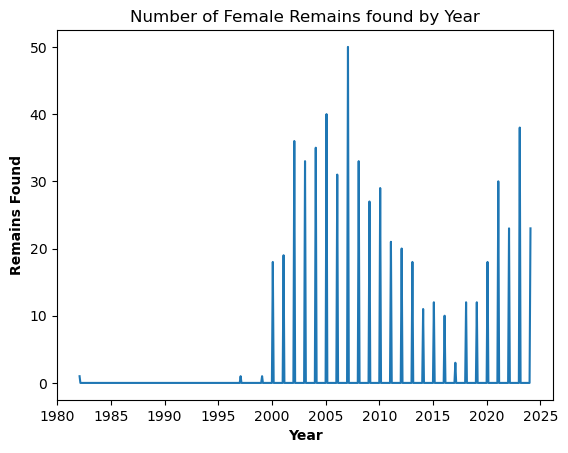

In [17]:
#create figure +axes objects (used Claude AI because it kept saving the jpg as empty and learnt that i have to create the figure first instead of assigning it a variable. i was using graph = plt.plot(female_deaths). i left the empty jpg in the output folder for transparency ) 
fig, ax = plt.subplots()
ax.plot(female_deaths)
plt.title("Number of Female Remains found by Year")
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Remains Found', fontweight='bold')

In [18]:
#save fig
fig.savefig('../output/female_graph.jpg', dpi=100, bbox_inches='tight')
